##### make a PCA 

In [87]:
import pandas as pd
import numpy as np

In [88]:
data = pd.read_csv("wine.csv")

In [89]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [90]:
data.drop('Type',axis=1, inplace=True)

In [92]:
data.head(2)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [36]:
## normalize the data 
from sklearn.preprocessing import scale

In [95]:
norm = scale(data)

In [98]:
norm[0:2]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152]])

In [99]:
## make the pca technique
from sklearn.decomposition import PCA

In [100]:
pca = PCA()

In [101]:
pca.fit_transform(norm)

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [104]:
pca = PCA(n_components=13)

In [105]:
pca_values = pca.fit_transform(norm)

In [106]:
vari = pca.explained_variance_ratio_
vari*100

array([36.1988481 , 19.20749026, 11.12363054,  7.06903018,  6.56329368,
        4.93582332,  4.23867932,  2.68074895,  2.2221534 ,  1.93001909,
        1.73683569,  1.29823258,  0.79521489])

In [107]:
vari2 = np.cumsum(np.round(vari, decimals=14)*100)

In [108]:
vari2

array([ 36.1988481 ,  55.40633836,  66.52996889,  73.59899908,
        80.16229276,  85.09811607,  89.3367954 ,  92.01754435,
        94.23969775,  96.16971684,  97.90655253,  99.20478511,
       100.        ])

In [109]:
## variance plot for pca
import matplotlib.pyplot as plt

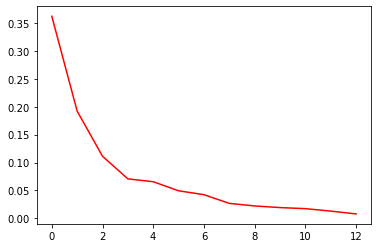

In [110]:
plt.plot(vari, color= 'red')

In [114]:
df = data.iloc[:, :3]
norm_data = norm[:, :3]

In [112]:
df.head()

,Alcohol,Malic,Ash
0,14.23,1.71,2.43
1,13.20,1.78,2.14
2,13.16,2.36,2.67
3,14.37,1.95,2.50
4,13.24,2.59,2.87


## make H clustring

In [115]:
import scipy.cluster.hierarchy as sch

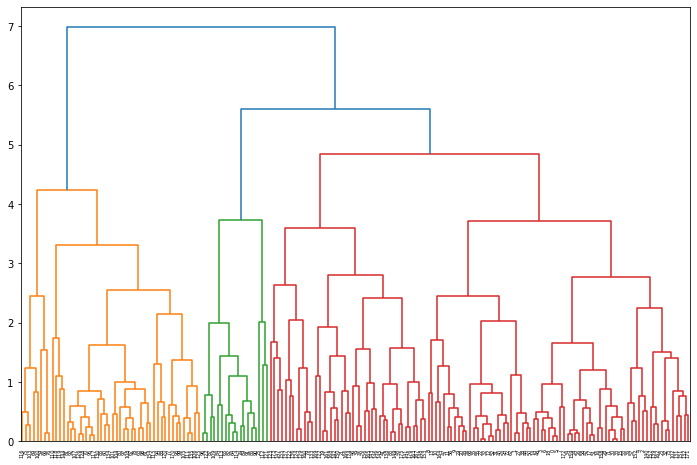

In [120]:
plt.figure(figsize= (12, 8))
dendro = sch.dendrogram(sch.linkage(norm_data, method='complete'))

In [125]:
from sklearn.cluster import AgglomerativeClustering

In [135]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')

In [136]:
prid = hc.fit_predict(norm_data)

In [137]:
prid

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

## k-means Clustring'


In [138]:
df.head(2)

,Alcohol,Malic,Ash
0,14.23,1.71,2.43
1,13.20,1.78,2.14


<function matplotlib.pyplot.show(close=None, block=None)>

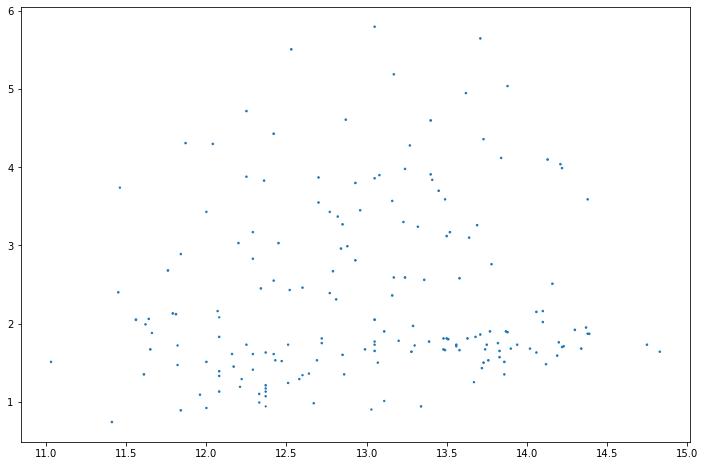

In [142]:
plt.figure(figsize=(12,8))
plt.scatter(df.Alcohol, df.Malic, df.Ash)
plt.show

In [143]:
from sklearn.cluster import KMeans

In [144]:
## now findout best k value
wcss = []
for i in range(1, 10):
    kmean = KMeans(n_clusters=i, random_state=0)
    kmean.fit(norm_data)
    wcss.append(kmean.inertia_)

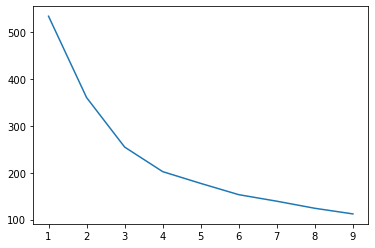

In [145]:
show = plt.plot(range(1,10), wcss)

In [148]:
## fit k value
model = KMeans(n_clusters=4)

In [149]:
model.fit_predict(norm_data)

array([3, 1, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2,
       3, 0, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 2, 3, 2, 3, 2,
       1, 2, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 3, 1, 1, 3, 3, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2,
       0, 2, 1, 1, 2, 2, 2, 0, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       1, 2, 2, 0, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 1, 1, 3, 2, 2, 2,
       3, 2])